### Lab 3: CSV Analysis with Python (Netflix Dataset)

**Learning goals:**

* Load and parse CSV files using Python.
* Build custom reusable functions to process tabular data.
* Use generators with `yield` to write memory-efficient code.
* Filter and analyze records from a dataset using conditional logic.
* Create summaries, counters, and frequency tables using `for` loops and dictionaries.
* Perform basic sorting, aggregation, and statistical operations manually.

Dataset:

* Download the data from Kaggle:
  * [Netflix Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows)

1. **Load the data in Python as a dictionary.**

Read the CSV data into a list of dictionaries, for later usage.

In [8]:
import csv

with open('C:/Users/markt/OneDrive/Documents/Birkbeck/MSc Data Science/Big Data Analytics/Lab-Exercises/Lab3/netflix_titles.csv', mode='r', newline='', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    data = [row for row in reader]

print(data[1])

{'show_id': 's2', 'type': 'TV Show', 'title': 'Blood & Water', 'director': '', 'cast': 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng', 'country': 'South Africa', 'date_added': 'September 24, 2021', 'release_year': '2021', 'rating': 'TV-MA', 'duration': '2 Seasons', 'listed_in': 'International TV Shows, TV Dramas, TV Mysteries', 'description': 'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.'}


**Here is the function implementation.**

In [9]:
import csv

def load_data(filename):
    with open(filename, mode='r', newline='', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        data = [row for row in reader]
    return data

netflix_data = load_data('C:/Users/markt/OneDrive/Documents/Birkbeck/MSc Data Science/Big Data Analytics/Lab-Exercises/Lab3/netflix_titles.csv')
print(netflix_data[:10])  # Print first entry

[{'show_id': 's1', 'type': 'Movie', 'title': 'Dick Johnson Is Dead', 'director': 'Kirsten Johnson', 'cast': '', 'country': 'United States', 'date_added': 'September 25, 2021', 'release_year': '2020', 'rating': 'PG-13', 'duration': '90 min', 'listed_in': 'Documentaries', 'description': 'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'}, {'show_id': 's2', 'type': 'TV Show', 'title': 'Blood & Water', 'director': '', 'cast': 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng', 'country': 'South Africa', 'date_added': 'September 24, 2021', 'release_year': '2021', 'rating': 'TV-MA', 'duration': '2 Seasons', 'listed_in': 'International TV S

**Time Complexity**: `O(n·m)`

- Opening file: `O(1)`
- Reading file line by line: `O(n)`, where n is the number of rows (excluding the header)
- Parsing each row into a dictionary: `O(n·m)`, where m is the number of columns (fields)
  - Each field is mapped to a key, so constructing a dict is `O(m)`
- List comprehension to store all rows: `O(n)`

**Space Complexity**: `O(n·m)`

* Data stores all n rows in memory
* Each row is a dictionary with m key-value pairs


2. **Create a function called `my_head(alist,limit)` to return the `n` first records of the dataset in a new list.**


In [ ]:
def my_head(alist,limit):
    n = 0
    for n in range(limit):
        if n < len(alist):
            yield alist[n]
        else:
            break

for item in my_head(load_data('C:/Users/markt/OneDrive/Documents/Birkbeck/MSc Data Science/Big Data Analytics/Lab-Exercises/Lab3/netflix_titles.csv'),10):
    print(item)

{'show_id': 's1', 'type': 'Movie', 'title': 'Dick Johnson Is Dead', 'director': 'Kirsten Johnson', 'cast': '', 'country': 'United States', 'date_added': 'September 25, 2021', 'release_year': '2020', 'rating': 'PG-13', 'duration': '90 min', 'listed_in': 'Documentaries', 'description': 'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'}
{'show_id': 's2', 'type': 'TV Show', 'title': 'Blood & Water', 'director': '', 'cast': 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng', 'country': 'South Africa', 'date_added': 'September 24, 2021', 'release_year': '2021', 'rating': 'TV-MA', 'duration': '2 Seasons', 'listed_in': 'International TV Sho

**Why use `yield`?**

- You get one item at a time (no list built in memory).
- It’s more efficient when you only need a few items from a large list or stream.
- Works well in pipelines or streaming scenarios.

Time Complexity: O(k) where k = min(limit,len(alist))

Space complexity: O(1) as just one item is in memory at each point in time


3. **Create a function called `my_head_col(alist,col,limit)`  to return the first records of a specific column from the dataset as a list.**

In [ ]:
def my_head_col(alist,col,limit):
    return_data = []
    for n in range(limit-1):
        if n < len(alist):
            return_data.append(alist[n][col])
        else:
            break
    return return_data

print(my_head_col(data,"title",10))

['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', 'Jailbirds New Orleans', 'Kota Factory', 'Midnight Mass', 'My Little Pony: A New Generation', 'Sankofa', 'The Great British Baking Show']


Time complexity: O(n) - worst case is limit = len(alist)

Space Complexity: O(k) - where k is the limit (worst case = O(n))

4. **Filters `titles` added in the year `2021`.**

**Develop a function for `shows_added_in_2021(data)` for `titles` from United States**

* **Solution with `return`**

In [ ]:
def shows_added_in_year(data,col,year):
    return_list = []
    for line in data:
        if line["release_year"] == str(year):
            return_list.append(line[col])
    return return_list

print(shows_added_in_year(data,"title",2021))

['Blood & Water', 'Ganglands', 'Jailbirds New Orleans', 'Kota Factory', 'Midnight Mass', 'My Little Pony: A New Generation', 'The Great British Baking Show', 'The Starling', 'Vendetta: Truth, Lies and The Mafia', 'Bangkok Breaking', 'Je Suis Karl', 'Confessions of an Invisible Girl', 'Crime Stories: India Detectives', 'Dear White People', 'Intrusion', 'Jaguar', 'Monsters Inside: The 24 Faces of Billy Milligan', 'Go! Go! Cory Carson: Chrissy Takes the Wheel', 'Love on the Spectrum', 'Ankahi Kahaniya', 'Chicago Party Aunt', 'Squid Game', 'The Father Who Moves Mountains', 'The Stronghold', 'Chhota Bheem', 'He-Man and the Masters of the Universe', 'My Heroes Were Cowboys', 'Castle and Castle', 'Nailed It', 'Nightbooks', 'Numberblocks', 'Schumacher', 'Too Hot To Handle: Latino', 'A StoryBots Space Adventure', 'Jack Whitehall: Travels with My Father', "The World's Most Amazing Vacation Rentals", 'You vs. Wild: Out Cold', 'Little Singham - Black Shadow', 'Tughlaq Durbar (Telugu)', 'Firedrake 

Time complexity:  O(n)

Space complexity: O(k) - where k is the number of titles from US added in 2021

* **Solution with `yield`**

In [ ]:
def yield_shows_added_in_year(data,col,year):
    for line in data:
        if line["release_year"] == str(year):
            yield line[col]

print([line for line in yield_shows_added_in_year(data,"title",2021)])

['Blood & Water', 'Ganglands', 'Jailbirds New Orleans', 'Kota Factory', 'Midnight Mass', 'My Little Pony: A New Generation', 'The Great British Baking Show', 'The Starling', 'Vendetta: Truth, Lies and The Mafia', 'Bangkok Breaking', 'Je Suis Karl', 'Confessions of an Invisible Girl', 'Crime Stories: India Detectives', 'Dear White People', 'Intrusion', 'Jaguar', 'Monsters Inside: The 24 Faces of Billy Milligan', 'Go! Go! Cory Carson: Chrissy Takes the Wheel', 'Love on the Spectrum', 'Ankahi Kahaniya', 'Chicago Party Aunt', 'Squid Game', 'The Father Who Moves Mountains', 'The Stronghold', 'Chhota Bheem', 'He-Man and the Masters of the Universe', 'My Heroes Were Cowboys', 'Castle and Castle', 'Nailed It', 'Nightbooks', 'Numberblocks', 'Schumacher', 'Too Hot To Handle: Latino', 'A StoryBots Space Adventure', 'Jack Whitehall: Travels with My Father', "The World's Most Amazing Vacation Rentals", 'You vs. Wild: Out Cold', 'Little Singham - Black Shadow', 'Tughlaq Durbar (Telugu)', 'Firedrake 

**Why use `yield`?**

* Time complexity:  O(n) - need to run through all the lines

* Space complexity: O(1) - only one item stored in memory


6. **Develop a function for `shows_added_in_2021(data)` for `titles` from United States**

Lists titles where country is `United States`.

* **Solution with `return`**

In [ ]:
def list_titles_from_country(data,country):
    result_list = []
    for item in data:
        if item["country"] == country:
            result_list.append(item["title"])
    return result_list

print(list_titles_from_country(data,"Italy"))


['Winx Club', '44 Cats', 'A Classic Horror Story', 'Security', 'Summertime', 'Baggio: The Divine Ponytail', 'Zero', 'Caught by a Wave', 'The Last Paradiso', 'SanPa: Sins of the Savior', 'Rose Island', 'The Beast', 'The Life Ahead', 'Suburra: Blood on Rome', 'The Binding', 'Baby', 'The Match', 'The Players', '#AnneFrank - Parallel Stories', 'Under the Riccione Sun', 'Curon', '18 Presents', 'The Trial', 'Ultras', 'Luna Nera', 'The App', 'Saverio Raimondo: Il Satiro Parlante', 'Francesco De Carlo: Cose di Questo Mondo', 'Edoardo Ferrario: Temi Caldi', '5 Star Christmas', 'On My Skin', 'Slam', 'Grillo vs Grillo', 'Welcome Mr. President', 'Bat Pat', 'Call Me Francis', 'Euphoria', 'La Coppia dei Campioni', 'Maggie & Bianca: Fashion Friends', 'My Honor Was Loyalty', 'Numero Zero. The Roots of Italian Rap', 'Roberto Saviano: Writing Under Police Protection', 'S Is for Stanley', 'The Music of Silence', 'The Sign of Venus']


Complexities are the same as 5 `return`.

* **Solution with `yield`**

In [ ]:
def yield_titles_from_country(data,country):
    for item in data:
        if item["country"] == country:
            yield item["title"]

print([line for line in yield_titles_from_country(data,"Italy")])

['Winx Club', '44 Cats', 'A Classic Horror Story', 'Security', 'Summertime', 'Baggio: The Divine Ponytail', 'Zero', 'Caught by a Wave', 'The Last Paradiso', 'SanPa: Sins of the Savior', 'Rose Island', 'The Beast', 'The Life Ahead', 'Suburra: Blood on Rome', 'The Binding', 'Baby', 'The Match', 'The Players', '#AnneFrank - Parallel Stories', 'Under the Riccione Sun', 'Curon', '18 Presents', 'The Trial', 'Ultras', 'Luna Nera', 'The App', 'Saverio Raimondo: Il Satiro Parlante', 'Francesco De Carlo: Cose di Questo Mondo', 'Edoardo Ferrario: Temi Caldi', '5 Star Christmas', 'On My Skin', 'Slam', 'Grillo vs Grillo', 'Welcome Mr. President', 'Bat Pat', 'Call Me Francis', 'Euphoria', 'La Coppia dei Campioni', 'Maggie & Bianca: Fashion Friends', 'My Honor Was Loyalty', 'Numero Zero. The Roots of Italian Rap', 'Roberto Saviano: Writing Under Police Protection', 'S Is for Stanley', 'The Music of Silence', 'The Sign of Venus']


- Time complexity: O(n)

- Space complexity: O(1) - only one item in memory at any time

7. **Titles with `love` (any case).**

Searches for titles containing the word `love` (case-insensitive).

* **Solution with `return`**


In [ ]:
def titles_with_love(data):
    return_list = []
    for item in data:
        if "love" in item["title"].lower():
            return_list.append(item["title"])
    return return_list

print(titles_with_love(data))

['Love on the Spectrum', "Love Don't Cost a Thing", 'Love in a Puff', 'LSD: Love, Sex Aur Dhokha', 'Really Love', 'Man in Love', 'Resort to Love', 'The Last Letter From Your Lover', 'Lethal Love', 'This Little Love Of Mine', 'Why Do Fools Fall in Love', 'Love Is a Story', 'Bangkok Love Stories: Innocence', 'Love (ft. Marriage and Divorce)', 'Kitty Love: An Homage to Cats', 'Love Jones', 'Sam Smith: Love Goes - Live at Abbey Road Studios', 'Love or Money', 'Love, Death & Robots', 'The Clovehitch Killer', 'The Lovely Bones', 'Love Naggers', 'My Love: Six Stories of True Love', "Story of Kale: When Someone's in Love", 'Elizabeth and Margaret: Love and Loyalty', 'Love Alarm', 'Love', 'Squared Love', 'Love Daily', 'Is Love Enough? Sir', 'A Love So Beautiful', 'Hello, Love, Goodbye', 'Lovestruck in the City', 'Ariana grande: excuse me, i love you', 'Eggnoid: Love & Time Portal', 'Love You to the Stars and Back', 'Must Be... Love', 'If Anything Happens I Love You', 'A Very Special Love', 'Fir

* **Solution with `yield`**

In [ ]:
def yield_titles_with_love(data):
    for item in data:
        if "love" in item["title"].lower():
            yield item["title"]
                       
print([line for line in yield_titles_with_love(data)])

['Love on the Spectrum', "Love Don't Cost a Thing", 'Love in a Puff', 'LSD: Love, Sex Aur Dhokha', 'Really Love', 'Man in Love', 'Resort to Love', 'The Last Letter From Your Lover', 'Lethal Love', 'This Little Love Of Mine', 'Why Do Fools Fall in Love', 'Love Is a Story', 'Bangkok Love Stories: Innocence', 'Love (ft. Marriage and Divorce)', 'Kitty Love: An Homage to Cats', 'Love Jones', 'Sam Smith: Love Goes - Live at Abbey Road Studios', 'Love or Money', 'Love, Death & Robots', 'The Clovehitch Killer', 'The Lovely Bones', 'Love Naggers', 'My Love: Six Stories of True Love', "Story of Kale: When Someone's in Love", 'Elizabeth and Margaret: Love and Loyalty', 'Love Alarm', 'Love', 'Squared Love', 'Love Daily', 'Is Love Enough? Sir', 'A Love So Beautiful', 'Hello, Love, Goodbye', 'Lovestruck in the City', 'Ariana grande: excuse me, i love you', 'Eggnoid: Love & Time Portal', 'Love You to the Stars and Back', 'Must Be... Love', 'If Anything Happens I Love You', 'A Very Special Love', 'Fir

Time complexity: O(n*m) - run through n lines and to search within the string is O(m)

Space complexity: O(n) where n is the number of matching titles that contain love.  Or O(1) for yield?

8. **PG-13 Movies**

Finds all movies with a `PG-13` rating.

* **Solution with `return`**

In [ ]:
def find_PG13(data):
    result_list = []
    for item in data:
        if item["rating"] == "PG-13":
            result_list.append(item["title"])
    return result_list

print(find_PG13(data))

['Dick Johnson Is Dead', 'The Starling', 'Grown Ups', 'Dark Skies', 'Paranoia', 'Birth of the Dragon', 'Jaws: The Revenge', 'Blood Brothers: Malcolm X & Muhammad Ali', 'Worth', 'Final Account', "Agatha Christie's Crooked House", 'An Unfinished Life', 'Clear and Present Danger', 'Dear John', 'Freedom Writers', 'Green Lantern', "Love Don't Cost a Thing", 'Mars Attacks!', 'Marshall', 'Mystery Men', 'Poseidon', 'Same Kind of Different as Me', 'School of Rock', 'Snervous Tyler Oakley', 'The Golden Child', 'The Nutty Professor', 'The Nutty Professor II: The Klumps', 'Welcome Home Roscoe Jenkins', 'Like Crazy', 'Misha and the Wolves', 'Quartet', 'The Paper Tigers', 'Pray Away', 'Beowulf', 'Catch Me If You Can', "Ferris Bueller's Day Off", 'Five Feet Apart', 'Inception', 'Major Payne', 'My Girl', 'Poms', 'Seabiscuit', 'Space Cowboys', 'The Losers', 'The Net', "Valentine's Day", 'The Book of Henry', 'The Twilight Saga: Breaking Dawn: Part 1', 'The Twilight Saga: Breaking Dawn: Part 2', 'The Twi

* **Solution with `yield`**

In [ ]:
def yield_find_PG13(data):
    for item in data:
        if item["rating"] == "PG-13":
            yield item["title"]

print([line for line in yield_find_PG13(data)])

['Dick Johnson Is Dead', 'The Starling', 'Grown Ups', 'Dark Skies', 'Paranoia', 'Birth of the Dragon', 'Jaws: The Revenge', 'Blood Brothers: Malcolm X & Muhammad Ali', 'Worth', 'Final Account', "Agatha Christie's Crooked House", 'An Unfinished Life', 'Clear and Present Danger', 'Dear John', 'Freedom Writers', 'Green Lantern', "Love Don't Cost a Thing", 'Mars Attacks!', 'Marshall', 'Mystery Men', 'Poseidon', 'Same Kind of Different as Me', 'School of Rock', 'Snervous Tyler Oakley', 'The Golden Child', 'The Nutty Professor', 'The Nutty Professor II: The Klumps', 'Welcome Home Roscoe Jenkins', 'Like Crazy', 'Misha and the Wolves', 'Quartet', 'The Paper Tigers', 'Pray Away', 'Beowulf', 'Catch Me If You Can', "Ferris Bueller's Day Off", 'Five Feet Apart', 'Inception', 'Major Payne', 'My Girl', 'Poms', 'Seabiscuit', 'Space Cowboys', 'The Losers', 'The Net', "Valentine's Day", 'The Book of Henry', 'The Twilight Saga: Breaking Dawn: Part 1', 'The Twilight Saga: Breaking Dawn: Part 2', 'The Twi

* Time complexity: O(n)
* Space complexity: O(k) for return, O(1) for yield

9. **Develop the `my_len` function, to count the total entries**

Counts the number of rows in the dataset.

In [ ]:
def my_len(data):
    count = 0
    for _ in data:
        count += 1
    return count

print(my_len(data))

8807


**Can I use yield?**

No because yield returns values one by one.  My_len is a function to return a single number, the total size.

- Time complexity: O(n)
- Space complexity: O(1)

10. **Count Types**

Counts how many entries are `TV Show` vs. `Movie`.

In [ ]:
def count_types(data):
    TV_shows = 0
    Movie = 0
    for item in data:
        if item["type"] == "TV Show":
            TV_shows += 1
        elif item["type"] == "Movie":
            Movie += 1
    return "Number of TV shows: " + str(TV_shows) + ".  Number of movies: " + str(Movie) + "."

print(count_types(data))

Number of TV shows: 2676.  Number of movies: 6131.


- Time complexity: O(n)
- Space complexity: O(1)

In [ ]:
def freq_table(data):
    result_dict = {}
    for item in data:
        if item["type"] in result_dict:
            result_dict[item["type"]] +=1
        else:
            result_dict[item["type"]] = 1
    return result_dict

print(freq_table(data))  

{'Movie': 6131, 'TV Show': 2676}


- Time complexity:  O(n) - since dictionary operations  like '+=1' and 'in' are on average O(1)
- Space complexity:  O(t) - where t is the number of types (usually t is small so treated as O(1))

12. **Average TV show seasons**

Calculates average number of seasons for TV shows.

In [ ]:
def average_seasons(data):
    total = 0
    count = 0
    for item in data:
        if "Season" in item["duration"] and item["duration"][0].isnumeric() and item["type"] == "TV Show":
            total += int(item["duration"][0])
            count += 1
    return "Average season duration: " + str(round(total / count,2)) + "."

print(average_seasons(data))

Average season duration: 1.7.


- Time complexity: O(n)
- Space complexity: O(1)

13. Sort by release year using `Bubble sort`.

In [ ]:
def bubble_sort(data,col):
    sorted_data = data[:]
    for i in range(0,len(sorted_data)-1):
        for j in range(0,len(sorted_data)-i-1):
            if int(sorted_data[j][col]) > int(sorted_data[j+1][col]):
                sorted_data[j],sorted_data[j+1] = sorted_data[j+1],sorted_data[j]
    return sorted_data

# print(bubble_sort(data,"release_year")[:]["title"])
output = bubble_sort(data,"release_year")
empty_dict = {}
for item in output:
    empty_dict[item["title"]] = item["release_year"]
print(empty_dict)

  


{'Pioneers: First Women Filmmakers*': '1925', 'Prelude to War': '1942', 'The Battle of Midway': '1942', 'Undercover: How to Operate Behind Enemy Lines': '1943', 'Why We Fight: The Battle of Russia': '1943', 'WWII: Report from the Aleutians': '1943', 'The Memphis Belle: A Story of a\nFlying Fortress': '1944', 'The Negro Soldier': '1944', 'Tunisian Victory': '1944', 'Five Came Back: The Reference Films': '1945', 'Know Your Enemy - Japan': '1945', 'Nazi Concentration Camps': '1945', 'San Pietro': '1945', 'Let There Be Light': '1946', 'Pioneers of African-American Cinema': '1946', 'Thunderbolt': '1947', 'White Christmas': '1954', 'The Blazing Sun': '1954', 'Rebel Without a Cause': '1955', 'Scandal in Sorrento': '1955', 'The Sign of Venus': '1955', 'Dark Waters': '1956', 'Forbidden Planet': '1956', 'Cairo Station': '1958', 'Cat on a Hot Tin Roof': '1958', 'Gigi': '1958', 'Ujala': '1959', 'Singapore': '1960', 'Butterfield 8': '1960', 'Jis Desh Men Ganga Behti Hai': '1960', "Ocean's Eleven": 

**How Bubble Sort Works:**

- Repeatedly compares adjacent elements
- Swaps them if they're in the wrong order
- "Bubbles" the largest value to the end in each pass

- Time complexity:  O(n^2)
- Space complexity:  O(n) - due to copying the list

14. **Convert durations**

The function extracts numeric values from the `"duration"` field and groups them into a dictionary based on units like `"min"`, `"Season"`, or `"Seasons"`. It skips empty or malformed entries.

*It works on a list of dictionaries where each dictionary has a `'duration'` key.*

In [ ]:
def convert_durations(data):
    output_dict = {}
    for item in data:
        duration_list = item.get("duration", "").strip().split(" ")
        if len(duration_list) <2:
            pass
        elif duration_list[1] in output_dict:
            output_dict[duration_list[1]].append(duration_list[0])
        else:
            try:
                output_dict[duration_list[1]] = [duration_list[0]]
            except:
                continue
    return output_dict

test_output = convert_durations(data)
print(test_output)
print(len(test_output))
print(test_output.keys())

{'min': ['90', '91', '125', '104', '127', '91', '67', '94', '161', '61', '166', '147', '103', '97', '106', '111', '110', '105', '96', '124', '116', '98', '91', '23', '115', '122', '99', '99', '88', '100', '102', '93', '96', '95', '85', '97', '95', '83', '103', '113', '13', '182', '106', '48', '145', '145', '93', '106', '147', '87', '96', '95', '92', '91', '90', '97', '80', '117', '128', '90', '119', '110', '143', '119', '114', '94', '106', '99', '118', '115', '95', '115', '108', '63', '117', '121', '142', '113', '154', '95', '108', '120', '100', '82', '124', '114', '104', '94', '94', '93', '97', '109', '88', '101', '105', '102', '101', '103', '106', '118', '86', '121', '229', '76', '95', '98', '89', '120', '110', '83', '121', '105', '94', '156', '112', '95', '107', '114', '129', '86', '97', '125', '107', '127', '128', '92', '135', '124', '136', '165', '124', '136', '150', '112', '119', '133', '142', '93', '113', '124', '116', '106', '145', '93', '95', '108', '90', '86', '92', '82', '70

Time Complexity:  O(2n) - not verified
Space Complexity:  O(n) - not verified

15. **What is the distribution of content types (TV Show vs Movie)?**

Create a **bar chart** showing how many titles fall into each type.

None


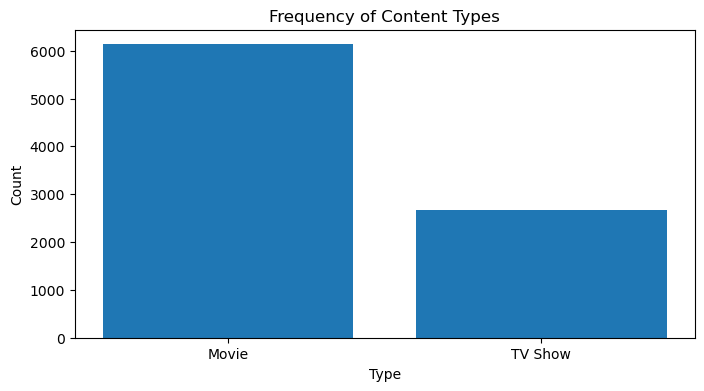

In [ ]:
import matplotlib.pyplot as plt
def types_bar(data):
    # create a dictionary with the frequency of content types
    freq_dict = {}
    for item in data:
        if item["type"] in freq_dict:
            freq_dict[item["type"]] += 1
        else:
            freq_dict[item["type"]] = 1
        
    plt.figure(figsize=(8, 4))
    plt.bar(freq_dict.keys(), freq_dict.values())
    plt.title("Frequency of Content Types")
    plt.xlabel("Type")
    plt.ylabel("Count")
    plt.tight_layout
    plt.show

print(types_bar(data))